In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [19]:
%matplotlib inline

In [58]:
#loading dataset
crop=pd.read_csv('Crop_Recommendation.csv')

In [12]:
crop.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [13]:
crop.duplicated().sum()

0

In [14]:
crop.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [45]:
crop.shape

(2200, 8)

In [16]:
crop.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


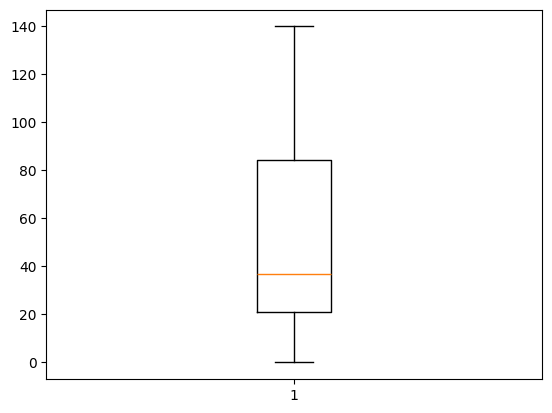

In [40]:
plt.boxplot(crop['Nitrogen'])
plt.show()

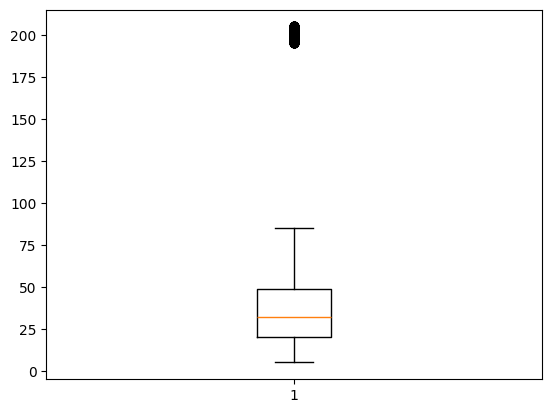

In [41]:
plt.boxplot(crop.Potassium)
plt.show()

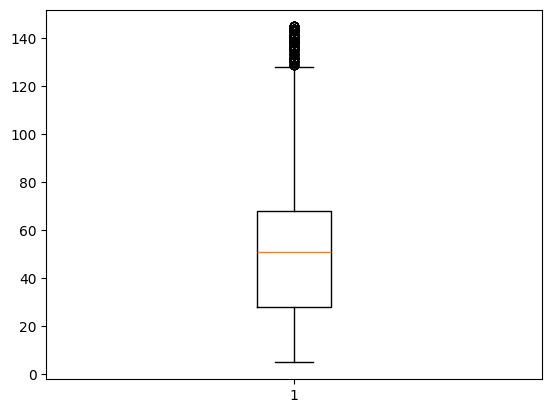

In [42]:
plt.boxplot(crop.Phosphorus)
plt.show()

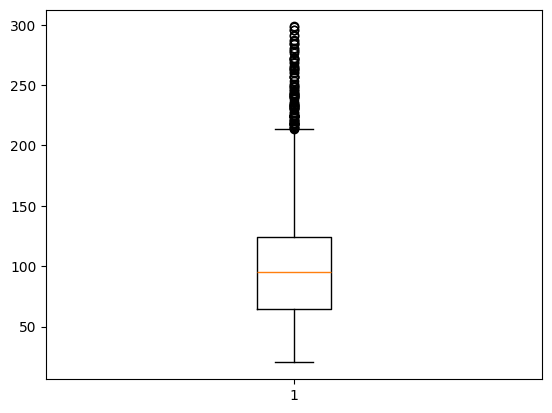

In [43]:
plt.boxplot(crop.Rainfall)
plt.show()

In [53]:
m=np.mean(crop.Rainfall)
d=np.std(crop.Rainfall)

z_sc=(crop.Rainfall-crop['Rainfall'].mean())/crop['Rainfall'].std()
outliers=z_sc[abs(z_sc>3)].index
outliers

Index([ 6, 12, 16, 19, 26, 30, 33, 36, 37, 38, 43, 54, 55, 59, 62, 69, 72, 75,
       76, 90, 96, 97],
      dtype='int64')

In [60]:
crop.loc[6]

Nitrogen              69
Phosphorus            55
Potassium             38
Temperature    22.708838
Humidity       82.639414
pH_Value        5.700806
Rainfall       271.32486
Crop                Rice
Name: 6, dtype: object

In [61]:
crop.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')

In [62]:
crop.Crop.value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [150]:
crop.Crop.unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

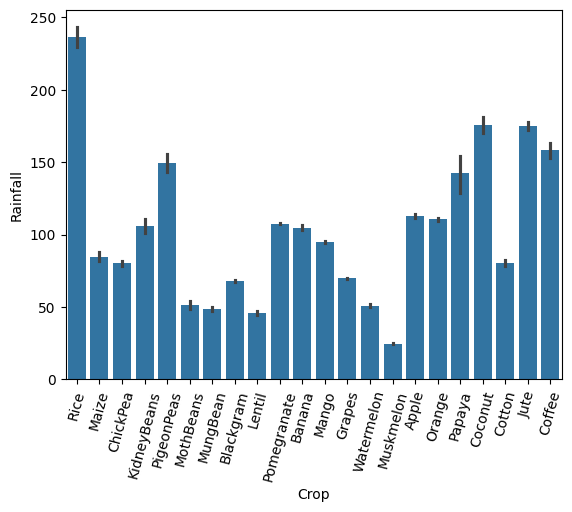

In [70]:
sns.barplot(x=crop.Crop,y=crop.Rainfall)
plt.xticks(rotation =75)
plt.show()

In [71]:
crop.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')

In [72]:
col=['Nitrogen','Phosphorus','Potassium','Temperature','Humidity','pH_Value']

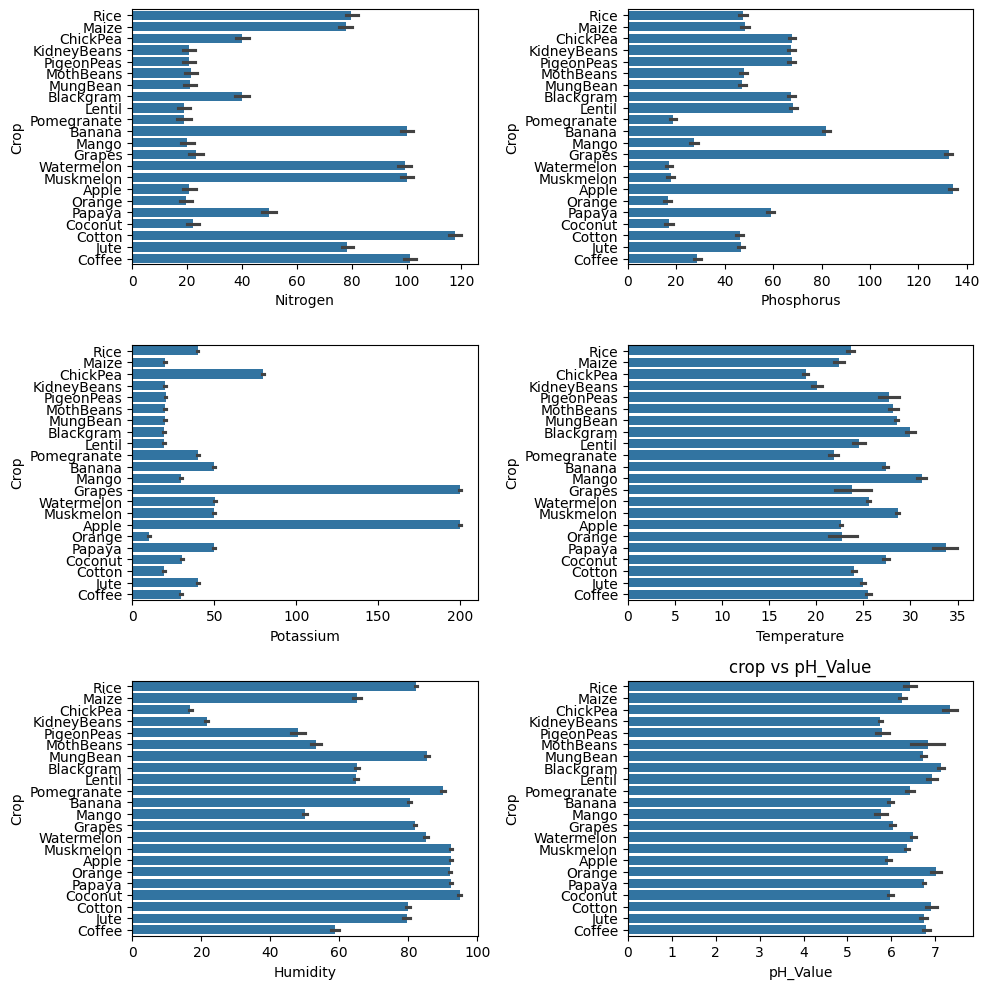

In [85]:
fig,axes=plt.subplots(3,2,figsize=(10,10))
axes=axes.flatten()
for i,c in enumerate(col):
    sns.barplot(y=crop.Crop,x=crop[c],ax=axes[i])
plt.tight_layout()
plt.show()

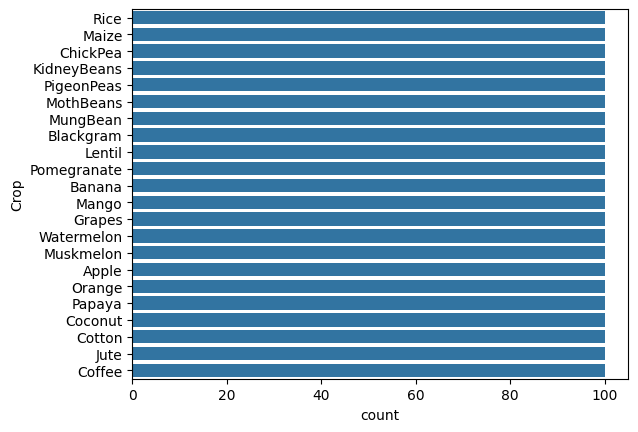

In [86]:
sns.countplot(crop.Crop)
plt.show()

# Splitting training and test data

In [107]:
X=crop.drop('Crop',axis=1)
y=crop['Crop']

In [110]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [111]:
y_enc=lab_enc.fit_transform(y)
y_enc

array([20, 20, 20, ...,  5,  5,  5])

In [114]:
class_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))

print("Class Mapping:", class_mapping)

Class Mapping: {'Apple': 0, 'Banana': 1, 'Blackgram': 2, 'ChickPea': 3, 'Coconut': 4, 'Coffee': 5, 'Cotton': 6, 'Grapes': 7, 'Jute': 8, 'KidneyBeans': 9, 'Lentil': 10, 'Maize': 11, 'Mango': 12, 'MothBeans': 13, 'MungBean': 14, 'Muskmelon': 15, 'Orange': 16, 'Papaya': 17, 'PigeonPeas': 18, 'Pomegranate': 19, 'Rice': 20, 'Watermelon': 21}


In [115]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y_enc,test_size=0.2,random_state=1)

# Model selection

In [119]:
model_param={
    'KNeighborsClassifier' : {
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': range(1,30,2)
        }},
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators' : [15,30,80,150],
            'max_depth':[2,3,4,5],
            'criterion':['entropy','gini'],
            'max_features':['auto','log2']
        }
    },
    'XGBoostClassifier':{
       'model':XGBClassifier(),
        'param':{
            'n_estimators' : [10,25,75,200],
            'max_depth' :[3,5,10],
            'learning_rate' : [0.1,0.01,0.2,0.5]
        }
    },
    'MLPClassifier':{
        'model':MLPClassifier(),
        'param':{
            'max_iter':[100,150,75],
            'hidden_layer_sizes':[(20,),(10,20,30),(100,50)],
            'activation':['tanh','softmax']
        }
    }
}
    

In [120]:
score=[]
for model,mp in model_param.items():
    m=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=7,return_train_score=False)
    m.fit(x_train,y_train)
    score.append({
        'model':model,
        'best_score':m.best_score_,
        'best_param':m.best_params_
    }
    )

In [121]:
score

[{'model': 'KNeighborsClassifier',
  'best_score': 0.9818164981796171,
  'best_param': {'n_neighbors': 1}},
 {'model': 'RandomForestClassifier',
  'best_score': 0.9914717547045379,
  'best_param': {'criterion': 'entropy',
   'max_depth': 5,
   'max_features': 'log2',
   'n_estimators': 150}},
 {'model': 'XGBoostClassifier',
  'best_score': 0.9903447434750793,
  'best_param': {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 10}},
 {'model': 'MLPClassifier',
  'best_score': 0.9636352548987723,
  'best_param': {'activation': 'tanh',
   'hidden_layer_sizes': (100, 50),
   'max_iter': 100}}]

In [122]:
rand_model=RandomForestClassifier(n_estimators=150,criterion='entropy',max_depth=5,max_features='log2')
rand_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=150)

In [125]:
rand_model.score(x_test,y_test)

0.9954545454545455

In [126]:
import pickle

In [142]:
pickle.dump(rand_model,open('model.pkl','wb'))

In [143]:
p=pickle.load(open('model.pkl','rb'))

In [144]:
x_train[:1]

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
1863,1,12,30,27.754298,95.946438,5.562224,131.090008


In [146]:
p.predict(x_train[:1])

array([4])

In [148]:
crop.loc[1863]

Nitrogen                1
Phosphorus             12
Potassium              30
Temperature     27.754298
Humidity        95.946438
pH_Value         5.562224
Rainfall       131.090008
Crop              Coconut
Name: 1863, dtype: object

In [149]:
class_mapping['Coconut']

4